In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
#f = h5py.File("trial2_losses.h5", "r")

#list(f.keys())

#discriminator = np.asarray(f["discriminator"])

#discriminator.shape

#discriminator

#discriminator_fake = np.asarray(f["discriminator_fake"])

#discriminator_fake

#discriminator_real = np.asarray(f["discriminator_real"])

#discriminator_real

#generator = np.asarray(f["generator"])

#generator.shape

#generator

#f.close()

In [22]:
def plotLoss(data, title):
    fig = plt.figure()
    plt.plot(data[:, 0])
    plt.title(title + " loss")
    plt.xlabel("epoch")
    plt.ylabel("W loss")
    plt.xlim(-50, 800)
    #plt.savefig(title + "_losses.png")

In [23]:
def losses(h5file):
    # (str) h5file: name of the file containing the loss arrays
    f = h5py.File(h5file, "r")
    discriminator = np.asarray(f["discriminator"])
    discriminator_fake = np.asarray(f["discriminator_fake"])
    discriminator_real = np.asarray(f["discriminator_real"])
    generator = np.asarray(f["generator"])
    f.close()
    
    plotLoss(discriminator, "discriminator")
    plotLoss(discriminator_real, "discriminator_real")
    plotLoss(discriminator_fake, "discriminator_fake")
    plotLoss(generator, "generator")

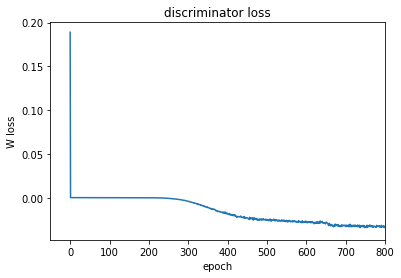

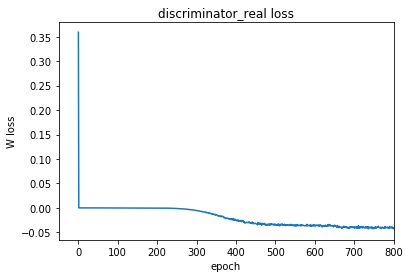

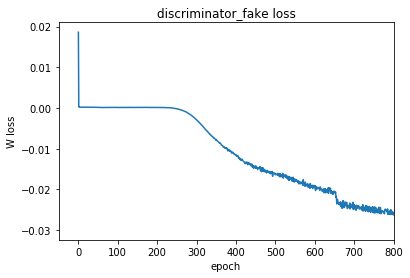

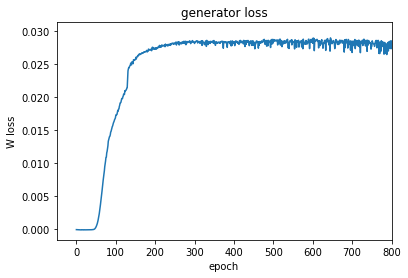

In [24]:
losses("batch_size_32_epochs_4000/trial2_losses.h5")

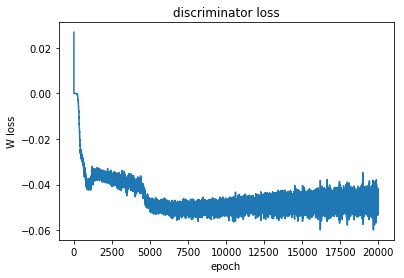

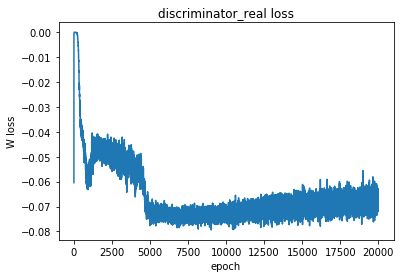

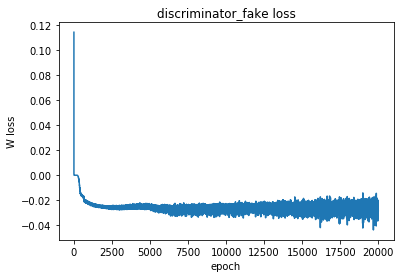

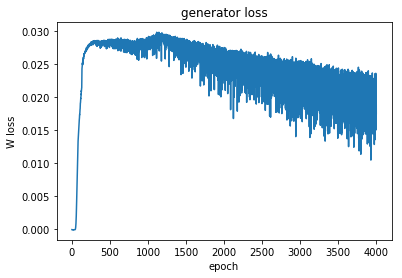

In [6]:
losses("val_trial2_losses.h5")

In [22]:
def plotLossVal(loss, val_loss, title):
    fig = plt.figure()
    plt.plot(loss[:, 0], label="train", color='blue', alpha=0.3)
    plt.plot(val_loss[:, 0], label="validation", color='red', alpha=0.3)
    plt.title(title + " loss")
    plt.xlabel("epoch")
    plt.ylabel("W loss")
    plt.legend()
    plt.savefig(title + "_losses+val.png")
    plt.show()

In [23]:
def lossesVal(h5file, h5file_val):
    # (str) h5file: name of the file containing the loss arrays
    f = h5py.File(h5file, "r")
    discriminator = np.asarray(f["discriminator"])
    discriminator_fake = np.asarray(f["discriminator_fake"])
    discriminator_real = np.asarray(f["discriminator_real"])
    generator = np.asarray(f["generator"])
    f.close()
    
    g = h5py.File(h5file_val, "r")
    val_discriminator = np.asarray(g["discriminator"])
    val_discriminator_fake = np.asarray(g["discriminator_fake"])
    val_discriminator_real = np.asarray(g["discriminator_real"])
    #generator = np.asarray(f["generator"])
    g.close()
    
    plotLossVal(discriminator, val_discriminator, "discriminator")
    plotLossVal(discriminator_real, val_discriminator_real, "discriminator_real")
    plotLossVal(discriminator_fake, val_discriminator_fake, "discriminator_fake")
    plotLoss(generator, "generator")

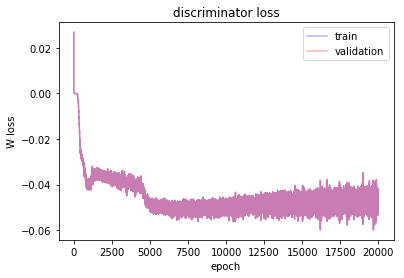

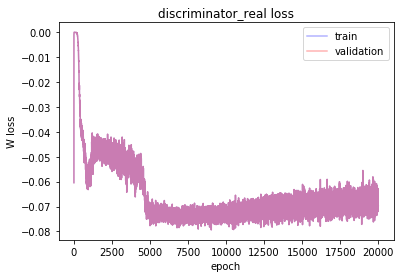

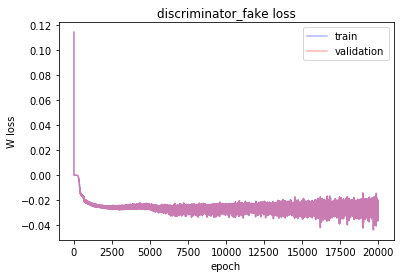

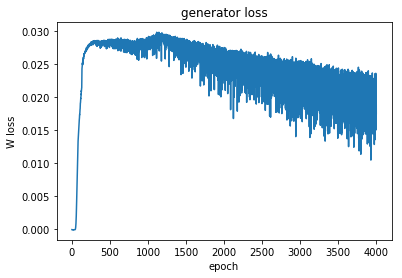

In [24]:
lossesVal("val_trial2_losses.h5", "val_trial2_losses.h5")